In [1]:
import pandas as pd
import numpy as np

import json

import os

from sklearn.metrics.pairwise import cosine_similarity

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

import time
import string
import itertools
import pickle

from collections import Counter
from itertools import filterfalse
from functools import reduce
from scipy import sparse

import gc

from tqdm import tqdm

from dask import distributed
from dask.distributed import Client, LocalCluster

# from glove import Corpus, Glove


import matplotlib.pyplot as plt

from utils import *

import seaborn as sns 
sns.set()

%matplotlib inline

[nltk_data] Downloading package punkt to /home/santhosr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
## Importing Glove_Cython

currDir = os.getcwd()
os.chdir("/home/santhosr/Documents/Courses/GloVe/glove_cython/Glove_Cython")
from glove_python import *
os.chdir(currDir)

In [3]:
os.chdir(currDir +'/Data')

In [11]:
# os.mkdir("1")
# os.mkdir("2")
# os.mkdir("3")
# os.mkdir("4")
# os.mkdir("5")




In [14]:
os.getcwd()

'/home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data'

In [15]:
!cp * /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/

cp: omitting directory '1'
cp: omitting directory '2'
cp: omitting directory '3'
cp: omitting directory '4'
cp: omitting directory '5'


In [19]:
os.chdir('/home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/')


In [25]:
!unzip 2018_01_112b52537b67659ad3609a234388c50a.zip -d /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1

Archive:  2018_01_112b52537b67659ad3609a234388c50a.zip
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/blogs_0000001.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/blogs_0000002.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0000003.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0000004.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0000005.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0000006.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0000007.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0000008.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0000009.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/blo

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0000781.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0000782.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0000783.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0000784.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0000785.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0000786.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0000787.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0000788.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0000789.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0000790.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0001717.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0001718.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0001719.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0001720.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0001721.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0001722.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0001723.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0001724.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0001725.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0001726.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0002657.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0002658.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0002659.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0002660.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0002661.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0002662.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0002663.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/blogs_0002664.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/blogs_0002665.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0002666.json  
  inflating: /home/santhosr/Documents/

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0003601.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0003602.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0003603.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0003604.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0003605.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0003606.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0003607.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0003608.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0003609.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0003610.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0004513.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0004514.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0004515.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0004516.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0004517.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0004518.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0004519.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0004520.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0004521.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0004522.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0005473.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0005474.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0005475.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0005476.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0005477.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0005478.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0005479.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0005480.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0005481.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0005482.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0006436.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0006437.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0006438.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0006439.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0006440.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0006441.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0006442.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0006443.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0006444.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0006445.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0007357.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0007358.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0007359.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0007360.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0007361.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0007362.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0007363.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0007364.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0007365.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0007366.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0008226.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0008227.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0008228.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0008229.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0008230.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0008231.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0008232.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0008233.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0008234.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0008235.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0009060.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0009061.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0009062.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0009063.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0009064.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0009065.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0009066.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0009067.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/blogs_0009068.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/blogs_0009069.json  
  inflating: /home/santhosr/Documents/

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0010042.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0010043.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0010044.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0010045.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0010046.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0010047.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0010048.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0010049.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0010050.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0010051.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0011021.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0011022.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0011023.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0011024.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0011025.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0011026.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0011027.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0011028.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0011029.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0011030.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0011998.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0011999.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0012000.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0012001.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0012002.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0012003.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0012004.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0012005.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0012006.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0012007.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/blogs_0012782.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0012783.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0012784.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0012785.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0012786.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0012787.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0012788.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0012789.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0012790.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0012791.json  
  inflating: /home/santhosr/Documents/C

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0013738.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0013739.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0013740.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0013741.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0013742.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0013743.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0013744.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0013745.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0013746.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0013747.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0014705.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0014706.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0014707.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0014708.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0014709.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0014710.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0014711.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0014712.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0014713.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0014714.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0015661.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0015662.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0015663.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0015664.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0015665.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0015666.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0015667.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0015668.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0015669.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0015670.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0016622.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0016623.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0016624.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0016625.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0016626.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0016627.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0016628.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0016629.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0016630.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0016631.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0017622.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/blogs_0017623.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0017624.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0017625.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0017626.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0017627.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0017628.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0017629.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0017630.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0017631.json  
  inflating: /home/santhosr/Documents/C

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0018585.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0018586.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0018587.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0018588.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0018589.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0018590.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0018591.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0018592.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0018593.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0018594.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0019581.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0019582.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0019583.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0019584.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0019585.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0019586.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0019587.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0019588.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0019589.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0019590.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0020539.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0020540.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0020541.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0020542.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0020543.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0020544.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0020545.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0020546.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0020547.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0020548.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0021526.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/blogs_0021527.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0021528.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0021529.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0021530.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0021531.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0021532.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0021533.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0021534.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0021535.json  
  inflating: /home/santhosr/Documents/C

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0022442.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0022443.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0022444.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0022445.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0022446.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0022447.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0022448.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0022449.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0022450.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0022451.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0023366.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0023367.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0023368.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0023369.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0023370.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0023371.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0023372.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0023373.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0023374.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/blogs_0023375.json  
  inflating: /home/santhosr/Documents/C

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0024268.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0024269.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0024270.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0024271.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0024272.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0024273.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0024274.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0024275.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0024276.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0024277.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0025203.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0025204.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0025205.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0025206.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0025207.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0025208.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0025209.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0025210.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0025211.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0025212.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0026102.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0026103.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0026104.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0026105.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0026106.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0026107.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0026108.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0026109.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0026110.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0026111.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0027078.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0027079.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0027080.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0027081.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0027082.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0027083.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0027084.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0027085.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0027086.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0027087.json  
  inflating: /home/santhosr/Documents/Co

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0028046.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0028047.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0028048.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0028049.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/blogs_0028050.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/blogs_0028051.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/blogs_0028052.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/blogs_0028053.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/blogs_0028054.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/blogs_0028055.json  
  inflating: /home/santhosr/Docume

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0029002.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0029003.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0029004.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0029005.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0029006.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0029007.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0029008.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0029009.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0029010.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0029011.json  
  inflating: /home/santhosr/Documents/Co

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0056723.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0056724.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0056725.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0056726.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0056727.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0056728.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0056729.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0056730.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0056731.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0056732.json  
  inflating: /home/santhosr/Documents/C

  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0057355.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0057356.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0057357.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0057358.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0057359.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0057360.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0057361.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0057362.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0057363.json  
  inflating: /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1/news_0057364.json  
  inflating: /home/santhosr/Documents/Co

In [24]:
!rm -rf /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/1

In [30]:
os.chdir('/home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/5')
len(os.listdir())

63147

In [ ]:
# fileList.remove('2018_05_112b52537b67659ad3609a234388c50a.zip')
# fileList.remove('2018_04_112b52537b67659ad3609a234388c50a.zip')
# fileList.remove('3811_112b52537b67659ad3609a234388c50a.zip')
# fileList.remove('2018_02_112b52537b67659ad3609a234388c50a.zip')
# fileList.remove('2018_03_112b52537b67659ad3609a234388c50a.zip')
# fileList.remove('2018_01_112b52537b67659ad3609a234388c50a.zip')

### Creating Tokenized Data

In [84]:
folder = '/home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/5'
fileList=os.listdir(folder)

os.chdir(folder)

In [85]:
def cleanLine(x):
    
    x = x.replace('\n','')
    
    x = x.lower()
    punctuationString = string.punctuation
    x = x.translate(str.maketrans(' ',' ', punctuationString))
    
    x = word_tokenize(x)
    
    return x

def processBatch(x):
    x = [cleanLine(i) for i in x ]
    
    #Removing all docs with length < 2
    x[:] = [doc for doc in x if len(doc)>=2]
    
    return x

In [86]:
dataLines = []

for i in tqdm(range(len(fileList))):
    
    a=json.load(open(os.path.join(fileList[i]) ,"r"))
    dataLines.append(a['text'])
    
    



100%|██████████| 63147/63147 [00:05<00:00, 11013.70it/s]

In [87]:
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in range(n))

In [68]:
client = Client()

/home/santhosr/.conda/envs/fastai/lib/python3.6/site-packages/distributed/bokeh/core.py:74: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [69]:
client

Client Scheduler: tcp://127.0.0.1:35157 Dashboard: http://127.0.0.1:37245/status,Cluster Workers: 4 Cores: 8 Memory: 67.19 GB


In [88]:

a = client.map(processBatch, list(split(dataLines,16)) )
b= client.gather(a)
b = list(itertools.chain.from_iterable(b))

client.cancel(a)
client.cancel(b)
# del a
# del b


In [89]:
with open('/home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/tokenizedData_5','wb') as f:
    pickle.dump(b,f)

In [62]:
os.chdir('/home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/')
fileList = os.listdir("./")

In [63]:
len(fileList)

6

In [59]:
!rm /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/*

/bin/sh: 1: rm: Argument list too long


In [56]:
!mv /home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/2018_05_112b52537b67659ad3609a234388c50a.zip /home/santhosr/Documents/Courses/GloVe/FinancialTesting/

### Creating Combined Word_to_id dict

In [103]:
def getVocab(i):
    
    fileName = '/home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/tokenizedData_'+str(i)
    x = pickle.load(open(fileName,'rb'))
    
    counter = Counter()
    for i in x:
        counter.update(i)
        
    gc.collect()
    
    return counter

In [104]:
# os.chdir('/home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/')

iterations = 1
startTime = time.time()
cpuStart = time.clock()


a = client.map(getVocab, list(range(1,6)))
b = client.gather(a)


endTime = time.time()
cpuEnd = time.clock()


print("Iterations : {} Avg. Clock time : {} Avg. CPU time : {} Clock time : {}  CPU time : {}".format(iterations, np.round((endTime - startTime)/iterations, 4) , np.round((cpuEnd - cpuStart)/iterations, 4), np.round(endTime - startTime,4), np.round(cpuEnd - cpuStart,4)))

Iterations : 1 Avg. Clock time : 18.1316 Avg. CPU time : 3.4533 Clock time : 18.1316  CPU time : 3.4533


In [105]:
c = b[0]

for i in range(1,len(b)):
    c.update(b[i])

In [116]:
with open('wordCount_fin','wb') as f:
    pickle.dump(c,f)

### Creating Combined Dictionary

In [189]:
wc = pickle.load(open('/home/santhosr/Documents/Courses/GloVe/wordCount','rb'))

wc_f = pickle.load(open('/home/santhosr/Documents/Courses/GloVe/FinancialTesting/Data/wordCount_fin','rb'))

In [190]:
## Creating based on the base gen data

vocabSize = 1000000

vocab_base = wc.most_common(vocabSize)

id_to_word = {i:x[0] for i,x in enumerate(vocab_base)}

word_to_id = {value:key for key,value in id_to_word.items()}

In [191]:
finVocabSize = 500000


## Words present in fin data but not general data
uniqueWords = set(wc_f.keys()).difference(wc.keys())

In [192]:
vocab_fin = wc_f.most_common()

#Keeping those words that appear only in fin data and not general data
a = [i for i in vocab_fin if i[0] in uniqueWords]


#This includes whatsapp, cryptocurrency, bitcoins, ubers, 
a = a[0:finVocabSize]

In [193]:
## Addings top words from fin data which werent present in gen data into the common dictionary

for i in range(finVocabSize):
    id_to_word[vocabSize + i] = a[i][0]

In [194]:
## Final word_to_id

word_to_id = {value:key for key,value in id_to_word.items()}

In [195]:
id_to_word[1300000]

'hammockswriting'

In [196]:
with open('comb_word_to_id','wb') as f:
    pickle.dump(word_to_id,f)

In [197]:
with open('comb_id_to_word','wb') as f:
    pickle.dump(id_to_word,f)

In [ ]:
np.max(list(dictionary.values())) != (len(dictionary) - 1))

In [199]:
np.max(list(word_to_id.values()))

1499999

### Creating Single Fin COO Matrix

In [4]:
a = pickle.load(open('/home/santhosr/Documents/Courses/GloVe/FinancialTesting/coo_1','rb'))

In [5]:
for i in range(2,6):
    b = pickle.load(open('/home/santhosr/Documents/Courses/GloVe/FinancialTesting/coo_'+str(i),'rb'))
    
    a = a+b

In [6]:
with open('/home/santhosr/Documents/Courses/GloVe/FinancialTesting/coo_fin_full','wb') as f:
    pickle.dump(a,f)

### Training Glove

In [3]:
b = pickle.load(open('tokenizedData','rb'))

In [4]:
corpus = Corpus()

In [5]:
%timeit -n 1 -r 1 corpus.fit(b)

1min 45s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [6]:
glove = Glove(no_components=200, learning_rate=0.05)

glove.add_dictionary(corpus.dictionary)



glove.fit(corpus.matrix, epochs=20,
          no_threads=8, verbose=True, wordList = ['board','approved','reuters','food','market','mutual','bond','cash','flow','money','directors'],save_gap=4)



glove.save('glove_200_20iter.model')

Performing 20 training epochs with 8 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


<Figure size 432x288 with 0 Axes>

In [7]:
b[1]

['jan',
 '12',
 'reuters',
 'kc',
 'property',
 'pcl',
 'board',
 'approved',
 'appointment',
 'of',
 'tiwaporn',
 'chanapanao',
 'as',
 'vicechairman',
 'of',
 'board\u200d\u200b',
 'source',
 'text',
 'for',
 'eikon',
 'further',
 'company',
 'coverage']

In [19]:
glove.word_vectors.shape

(477889, 200)

In [20]:
glove.dictionary['happy']

4635

### Testing Glove Data

In [2]:
glove = Glove.load('glove_200_80iter.model')

In [ ]:
glove.

In [3]:
wordList = []

with open('/home/santhosr/Documents/Courses/GloVe/financeWordList.txt') as f:
    wordList = f.readlines()
    
wordList = [x[:-1].split("\t")  for x in wordList[1:]]

wordList = sorted(wordList, key = lambda x : x[1])

wordList = [x[0] for x in wordList]

In [4]:
vectorList = [glove.word_vectors[glove.dictionary[x]].reshape(1,-1) for x in wordList]

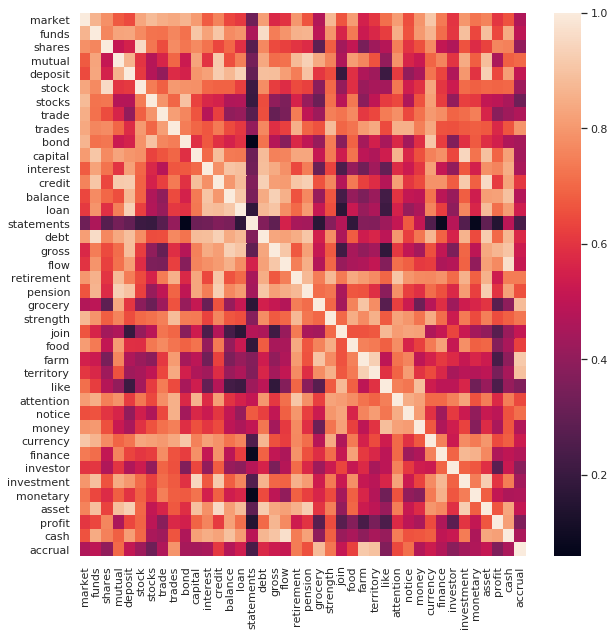

In [31]:
## Model with 2 iterations
getHeatMap(None,wordList, vectorList)

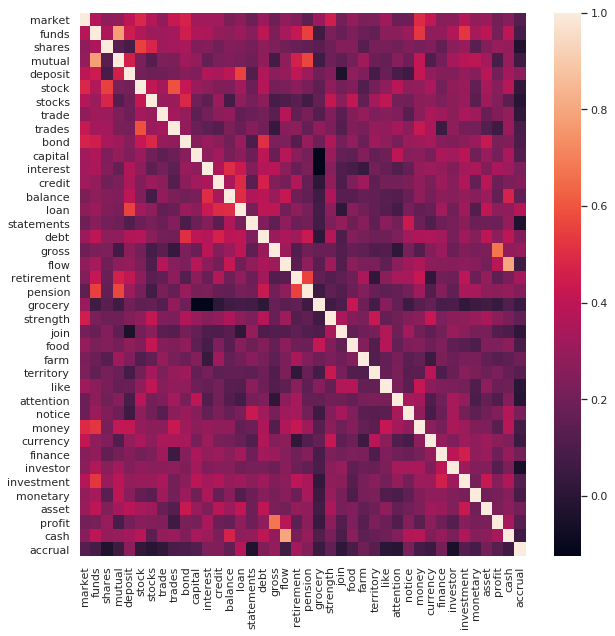

In [9]:
## Model with 40 iterations
getHeatMap(None,wordList, vectorList)

In [10]:
glove.most_similar('mutual')

[('funds', 0.7762769025848678),
 ('exchangetraded', 0.7171988789142437),
 ('openend', 0.6991862463636414),
 ('12913679', 0.6720163737815666)]

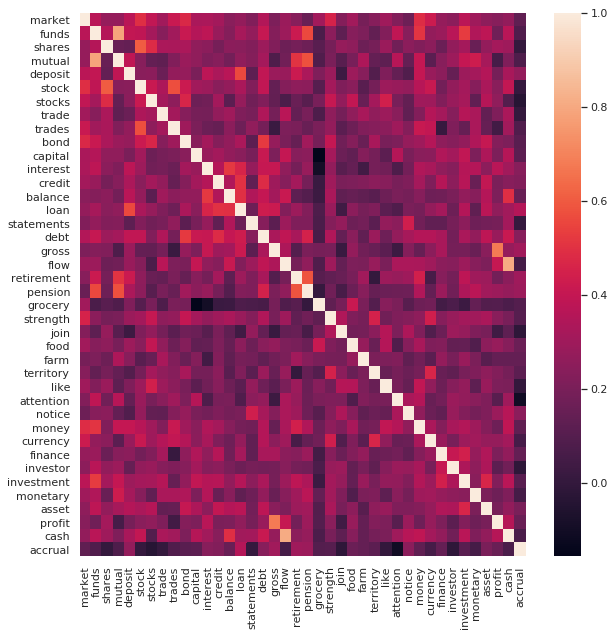

In [5]:
## Model with 80 iterations
w = getHeatMap(glove,wordList)

In [7]:
from scipy.misc import imsave

In [12]:
plt.savefig(w, 'adsd.jpg')

TypeError: savefig() takes 2 positional arguments but 3 were given

<Figure size 432x288 with 0 Axes>

In [13]:
w

In [15]:
fig = w.get_figure()
fig.savefig("output.png")